In [36]:
import numpy as np
import cv2
import pywt
import random
import math
import cmath
from math import log10, sqrt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Calculating PSNR

In [29]:
# !mkdir DWT_DCT_SVD
# !mkdir DWT
# !mkdir pictures

In [37]:
def PSNR(original, watermarked):
  #calculates and returns the PSNR values.
    mse = np.mean((original - watermarked) ** 2)
    if(mse == 0): 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Calculating DFT

In [38]:
def DWT(coverImage, watermarkImage):
    coverImage = cv2.resize(coverImage,(300,300))
    watermarkImage = cv2.resize(watermarkImage,(150,150))
    cv2.imwrite('DWT/coverImage.png',coverImage)
    cv2.imwrite('DWT/watermarkImage.png',watermarkImage)
    #DWT on cover image
    coverImage =  np.float32(coverImage)   
    coverImage /= 255;
    coeffC = pywt.dwt2(coverImage, 'haar')
    cA, (cH, cV, cD) = coeffC
    
    watermarkImage = np.float32(watermarkImage)
    watermarkImage /= 255;

    #Embedding
    coeffW = (0.4*cA + 0.1*watermarkImage, (cH, cV, cD))
    watermarkedImage = pywt.idwt2(coeffW, 'haar')
    print("PSNR value for DWT is",PSNR(coverImage,watermarkedImage))
    watermarkedImage=watermarkedImage*255
    img=watermarkedImage.astype('uint8')
    cv2.imwrite('DWT/watermark_image.png',img)

# Calculating DWT_DCT_SVD

In [39]:
def DWT_DCT_SVD(coverImage, watermarkImage):
    coverImage = cv2.resize(coverImage,(512,512))
    watermarkImage = cv2.resize(watermarkImage,(256,256))
    cv2.imwrite('DWT_DCT_SVD/coverImage.png',coverImage)
    cv2.imwrite('DWT_DCT_SVD/watermarkImage.png',watermarkImage)
    coverImage = np.float32(coverImage)
    
    coverImage /= 255
    coeff = pywt.dwt2(coverImage, 'haar')
    cA, (cH, cV, cD) = coeff

    watermarkImage = np.float32(watermarkImage)
    watermarkImage_dct = cv2.dct(watermarkImage)
    cA_dct = cv2.dct(cA)

    ua,sa,va=np.linalg.svd(cA_dct,full_matrices=1,compute_uv=1)
    uw,sw,vw=np.linalg.svd(watermarkImage,full_matrices=1,compute_uv=1)
    
    #Embedding
    alpha=10
    sA=np.zeros((256,256),np.uint8)
    sA[:256,:256]=np.diag(sa)
    sW=np.zeros((256,256),np.uint8)
    sW[:256,:256]=np.diag(sW)
    W=sA+alpha*sW

    u1,w1,v1=np.linalg.svd(W,full_matrices=1,compute_uv=1)
    ww=np.zeros((256,256),np.uint8)
    ww[:256,:256]=np.diag(w1)
    Wmodi=np.matmul(ua,np.matmul(ww,va))

    widct= cv2.idct(Wmodi)
    watermarkedImage=pywt.idwt2((widct,(cH,cV,cD)),'haar')
    print("PSNR value for DWT_DCT_SVD",PSNR(coverImage,watermarkedImage))
    watermarkedImage=watermarkedImage*255
    img=watermarkedImage.astype('uint8')
    cv2.imwrite('DWT_DCT_SVD/watermark_image.png',img)

# Displaying the Watermarked image

In [40]:
def display():
    ax=[]
    fig=plt.figure(figsize=(15,10))
    ax.append(fig.add_subplot(1,3,1))
    ax[-1].set_title("Cover Image:")
    plt.imshow(cv2.imread('DWT/coverImage.png'),cmap='gray')
    ax.append(fig.add_subplot(1,3,2))
    ax[-1].set_title("Watermark Image:")
    plt.imshow(cv2.imread('DWT/watermarkImage.png'),cmap='gray')
    ax.append(fig.add_subplot(1,3,3))
    ax[-1].set_title("Watermarked Image:")
    plt.imshow(cv2.cvtColor(cv2.imread('DWT/watermark_image.png'),cv2.COLOR_BGR2GRAY),cmap='gray')
    fig.suptitle('PSNR value of DWT is 60.91246676418044',fontsize=16)
    fig=plt.figure(figsize=(15,10))
    ax.append(fig.add_subplot(1,3,1))
    ax[-1].set_title("Cover Image:")
    plt.imshow(cv2.imread('DWT_DCT_SVD/coverImage.png'),cmap='gray')
    ax.append(fig.add_subplot(1,3,2))
    ax[-1].set_title("Watermark Image:")
    plt.imshow(cv2.imread('DWT_DCT_SVD/watermarkImage.png'),cmap='gray')
    ax.append(fig.add_subplot(1,3,3))
    ax[-1].set_title("Watermarked Image:")
    plt.imshow(cv2.cvtColor(cv2.imread('DWT_DCT_SVD/watermark_image.png'),cv2.COLOR_BGR2GRAY),cmap='gray')
    fig.suptitle('PSNR value of DWT-DCT-SVD is 85.03977978726881',fontsize=16)

In [41]:
coverImage = cv2.cvtColor(cv2.imread("C:/Users/ANAND VINOD/Desktop/pics/pictures/image1.png"),cv2.COLOR_BGR2GRAY)
watermarkImage = cv2.cvtColor(cv2.imread("C:/Users/ANAND VINOD/Desktop/pics/pictures/image2.png"),cv2.COLOR_BGR2GRAY)
DWT(coverImage,watermarkImage)
DWT_DCT_SVD(coverImage,watermarkImage)
#display()
cv2.waitKey(0)
cv2.destroyAllWindows()

PSNR value for DWT is 60.91246676418044
PSNR value for DWT_DCT_SVD 85.03977978726881


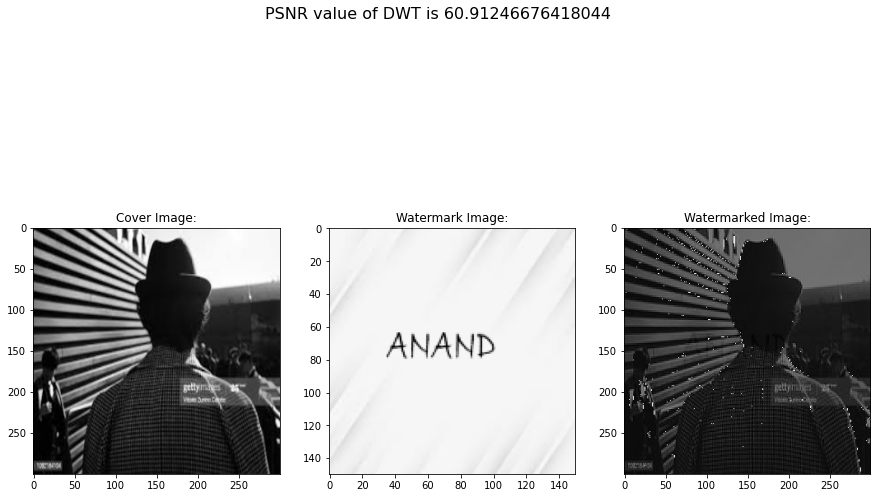

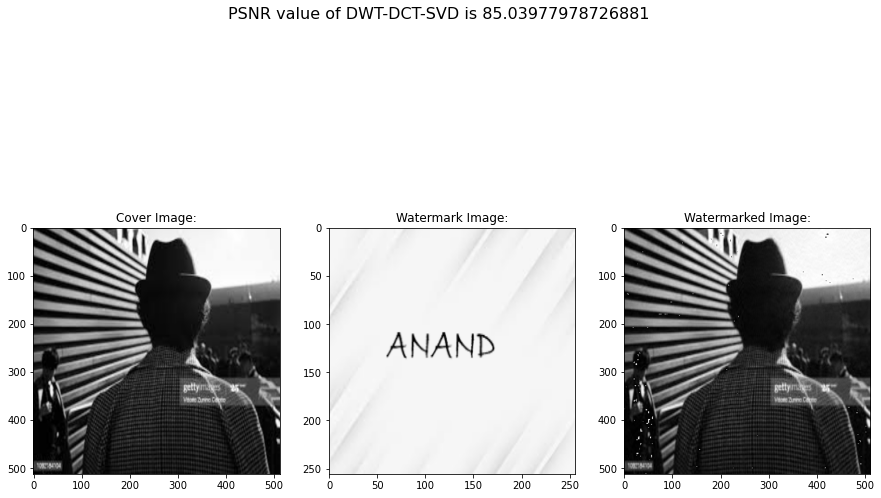

In [42]:
display()